# Question -1 
Write an efficient algorithm that searches for a value target in an m x n integer matrix. This matrix has the following properties:

Integers in each row are sorted from right to left.

The first integer of each row is greater than the last integer of the previous row.

                              Example-: 

                                        Input: matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

                                         Output: True

In [40]:
matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]
target = 16

In [43]:
def search_matrix(matrix,target):
    """
    This function searches for a target value in an mxn matrix.
    """
    # get the no of rows and columns of the matrix
    m,n = len(matrix),len(matrix[0])

  
    # get the left and right index
    left,right = 0, m*n -1

    # search logic based on left , right index and middle value
    while left <= right:
        
        mid_index = (left + right) // 2
        
        mid_value = matrix[mid_index // n][mid_index % n]
        
        print(mid_index,mid_value)
        
        if target == mid_value:
            return True # middle value is target
        
        elif  mid_value < target : # if target is greater than middle value ; then target lies in right half of matrix ; so set left = mid+1
            left  = mid_index  + 1
            
        else: # if target is greater than middle value ; then target lies in right half of matrix ; so set right = mid-1
            right = mid_index - 1
    return False 



In [44]:
search_matrix(matrix,target)

5 11
8 23
6 16


True

# question-2 


2.  Write a program that takes a string as input, and counts the frequency of each word in the string, there might  be repeated characters in the string. Your task is to find the highest frequency and returns the length of the  highest-frequency word. 

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide  an explanation for the same.  

Example input - string = “write write write all the number from from from 1 to 100” 

Example output - 5 

Explanation - From the given string we can note that the most frequent words are “write” and “from” and  the maximum value of both the values is “write” and its corresponding length is 5 



In [107]:
string = 'write write write all the number from from from 1 to 100'

def high_freqeuncy_word(string):
    unique_words = {}

    for word in string.split(" "):
        unique_words[word] = unique_words.get(word,0) + 1 
            
    max_length = max(unique_words.values())
    max_length_words = [word for word,freq in unique_words.items() if freq == max_length ]
    #print(max_length_words)
    return max(max_length_words,key=len)
        

In [108]:
high_freqeuncy_word(string)

'write'

In [109]:
string = "apple banana apple fruit banana orange fruit apple"
high_freqeuncy_word(string)

# returns apple since apple apper

'apple'

#### Input String: "apple orange banana apple grape apple"

#### Expected Output: "apple"

#### Explanation: In this string, "apple" appears 3 times, more frequently than any other word. No other word matches its frequency, so the function should return "apple" directly.

In [110]:
string = "blue red green blue red blue longword"
high_freqeuncy_word(string)

'blue'

#### Input String: "blue red green blue red blue longword"

#### Expected Output: "blue"

#### Explanation: Here, "blue" and "red" both have a high frequency, appearing 3 and 2 times respectively. . Since "blue" has the highest frequency. The correct high-frequency word is "blue", as it's the most frequent.

# Machine learning:

Total Marks: 30
Each question 15 marks   
                                                                

## Question: 1

1. Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 
Dataset This is the Dataset You can use this dataset for this question. 



In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("instagram_reach.csv",index_col="S.No").iloc[:,1:]
data.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
S.No,,,,,,
1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [8]:
data.shape

(100, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 25
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 5.5+ KB


In [24]:
data.describe(include='all')

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
count,100,94,100.00000,100,100,100.00000
unique,95,94,NaN,98,11,NaN
top,mikequindazzi,Who are #DataScientist and what do they do? >>...,NaN,#DeepLearning #MachineLearning#ArtificialIntel...,2 hours,NaN
freq,4,1,NaN,2,57,NaN
mean,NaN,NaN,961.96000,NaN,NaN,46.48000
std,NaN,NaN,1014.62567,NaN,NaN,55.08698
min,NaN,NaN,11.00000,NaN,NaN,8.00000
25%,NaN,NaN,252.75000,NaN,NaN,19.00000
50%,NaN,NaN,612.00000,NaN,NaN,29.00000
75%,NaN,NaN,1197.00000,NaN,NaN,46.00000


In [16]:
data[data['Caption'].isnull()]

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
S.No,,,,,,
21,opensourcedworkplace,NaN,348,#HR #workplace#officedesign #iot #bigdata #off...,4 hours,17
17,remi_ole,NaN,2175,#entrepreneur #entrepreneurial#entrepreneurmin...,2 hours,41
25,kamalalshehabi,NaN,955,#qoute #success#motivation #entrepreneur #insp...,2 hours,20
11,anandvanjape,NaN,460,#Designer #style #artist#brand #logo #monogram...,2 hours,29
23,monde_informatique,NaN,2455,monde_informatique#client #project#product #pr...,3 hours,24
12,inmemovement,NaN,1196,#INME #inmemovement#indianeedsmoreentrepreneur...,2 hours,16


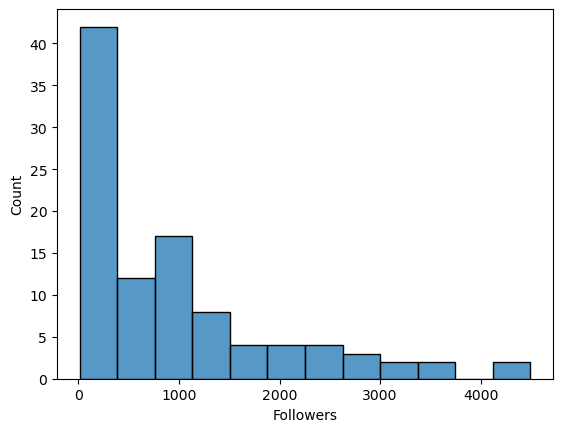

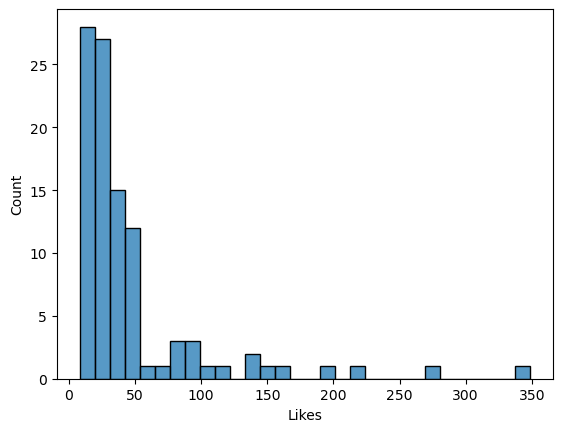

In [9]:
for col in data.select_dtypes("number").columns:
    sns.histplot(data,x=col)
    plt.show()

<AxesSubplot: xlabel='USERNAME'>

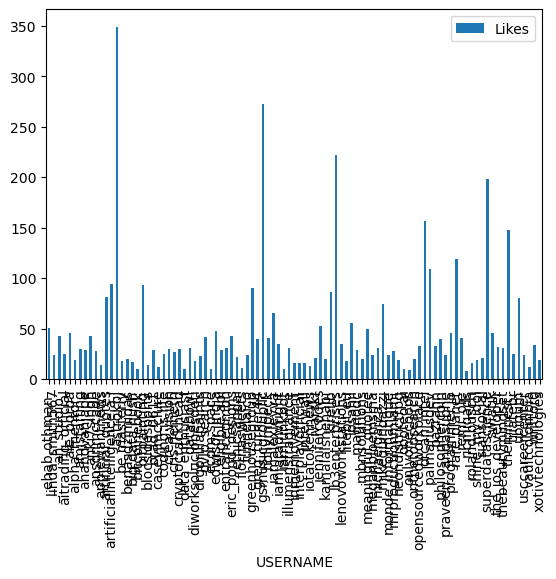

In [13]:
data.groupby("USERNAME").agg({"Likes":"mean"}).plot.bar()

In [72]:
data["Hashtags"] = data["Hashtags"].apply(lambda x:x.split("#"))
data['Hashtags'] = data['Hashtags'].str.join('|')

data["Time since posted"] = data["Time since posted"].str[:-5].astype("float")

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming `df` is your DataFrame with the Instagram data
X = data.drop(['Likes', 'Time since posted',"Caption"], axis=1)
y = data[['Likes', 'Time since posted']]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for numerical and categorical data
numeric_features = ['Followers']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['USERNAME','Hashtags']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        # Add text preprocessing transformer
    ])

# Model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = pipeline.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


RMSE: 22.4667478976344


 ## Question: 2
2. 
Explain how you can implement ML in a real world application.

Train an SVM regressor on : Bengaluru housing dataset

                  Must include in details:

                           - EDA

                            - Feature engineering 

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming `df` is your DataFrame with the Instagram data
X = data.drop(['price'], axis=1)
y = data[['price']]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for numerical and categorical data
numeric_features = ['total_sqft','bath','balcony']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['area_type','availability','location','size','society']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        # Add text preprocessing transformer
    ])

# Model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVR())])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = pipeline.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


ValueError: could not convert string to float: '1150 - 1194'